## Tensorflow Project - Bank Note Authentication

In [3]:
import pandas as pd

In [5]:
data = pd.read_csv("bank_note_data.csv")

In [6]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

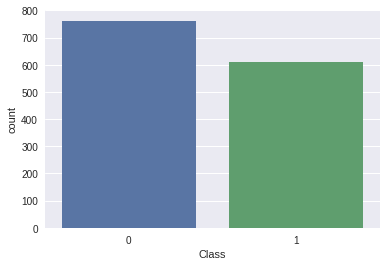

In [9]:
sns.countplot(x="Class", data=data)

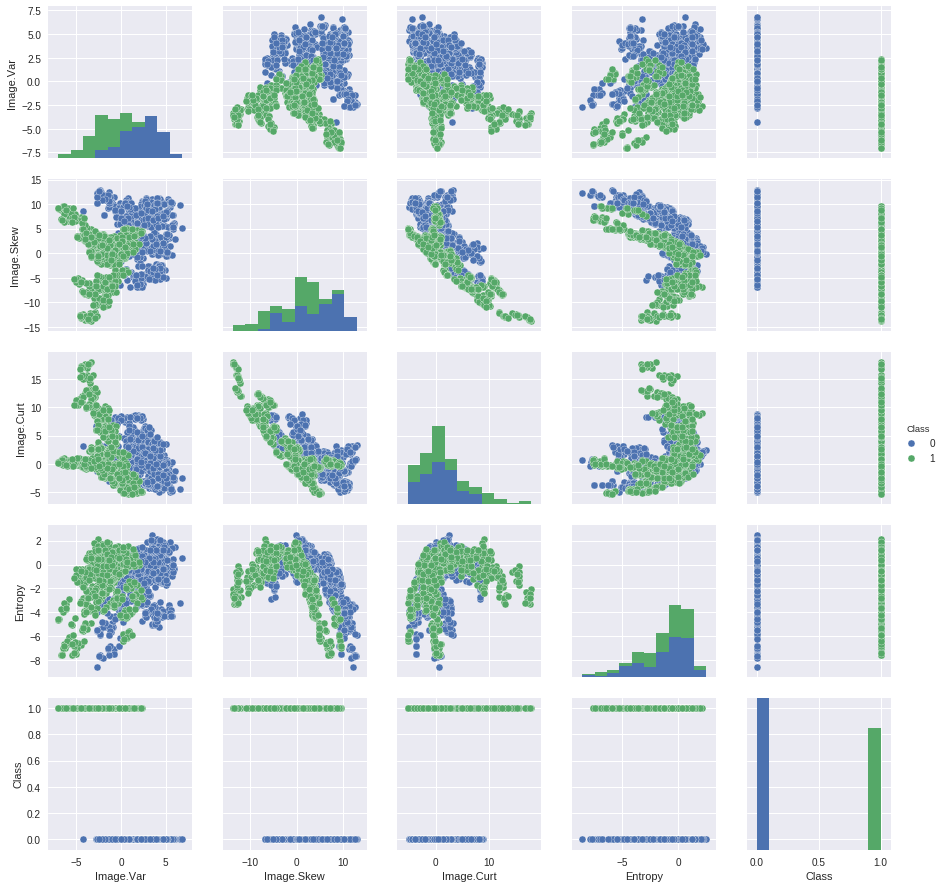

In [10]:
sns.pairplot(data=data, hue='Class')

## Data Preparation

In [12]:
import sklearn as sns

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(data.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

In [17]:
df_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [18]:
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

In [19]:
X = df_feat

In [20]:
y = data['Class']

In [21]:
X = X.as_matrix()
y = y.as_matrix()

In [22]:
from sklearn.cross_validation import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Tesnsorflow

In [25]:
import tensorflow as tf

In [27]:
feature_columns =tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

In [30]:
classifier = tf.contrib.learn.DNNClassifier(
              feature_columns=feature_columns, hidden_units =[10,20,10], n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f05184103c8>, '_master': '', '_num_ps_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000}


In [35]:
classifier.fit(X_train,y_train, steps=200)
predictions = list(classifier.predict(X_test, as_iterable=True))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/home/vishal/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 201 into /tmp/tmp88i61h3s/model.ckpt.
INFO:tensorflow:loss = 0.0270662, step = 201
INFO:tensorflow:global_step/sec: 168.833
INFO:tensorflow:loss = 0.0143803, step = 301
INFO:tensorflow:Saving checkpoints for 400 into /tmp/tmp88i61h3s/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00900384.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estim

## Model Evaluation

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,predictions))

[[223   0]
 [  0 189]]


In [39]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       223
          1       1.00      1.00      1.00       189

avg / total       1.00      1.00      1.00       412



## Comparison

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=200)

In [43]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [44]:
rfc_preds = rfc.predict(X_test)

In [45]:
print(classification_report(y_test,rfc_preds))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       223
          1       0.98      0.99      0.99       189

avg / total       0.99      0.99      0.99       412



In [46]:
print(confusion_matrix(y_test,rfc_preds))

[[220   3]
 [  1 188]]
